# Прогноз цен на подержанные автомобили

В этом практическом проекте мы обучим 3 алгоритма машинного обучения, а именно множественную линейную регрессию, регрессию Random Forest и XG-Boost, для прогнозирования цен на подержанные автомобили. Этот проект может быть использован автосалонами для прогнозирования цен на подержанные автомобили и понимания ключевых факторов, влияющих на цены подержанных автомобилей. Данные для обучение были полученный на сайте [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction). Мы выполним следующие этапы:

* Импорт наборов данных и библиотек
* Выполнение визуализации данных
* Подготовка данных перед обучением модели
* Обучение и оценка множественной линейной регрессии
* Обучение и оценка моделей дерева решений и случайного леса 
* Обучение модели регрессора xg-boost
* Сравнение моделей и расчет KPI регрессии

### Импорт наборов данных и библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Чтение файла CSV 
df = pd.read_csv("data.csv")
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [3]:
# Преобразуйте тип данных MSRP и Invoice в целое число, поэтому нам нужно удалить знак $ и запятую (,) из этих двух столбцов.

df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype(int)

df["Invoice"] = df["Invoice"].str.replace("$", "")
df["Invoice"] = df["Invoice"].str.replace(",", "")
df["Invoice"] = df["Invoice"].astype(int)

<ipython-input-3-3116132e6d84>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["MSRP"] = df["MSRP"].str.replace("$", "")


In [6]:
# Проверка наличия отсутствующих значений в наборе данных
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
# Заполним недостающие данные
df.sort_values(by="EngineSize", inplace=True)
df.fillna(method="bfill", inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 247 to 114
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 50.2+ KB


In [9]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


### Выполнение визуализации данных

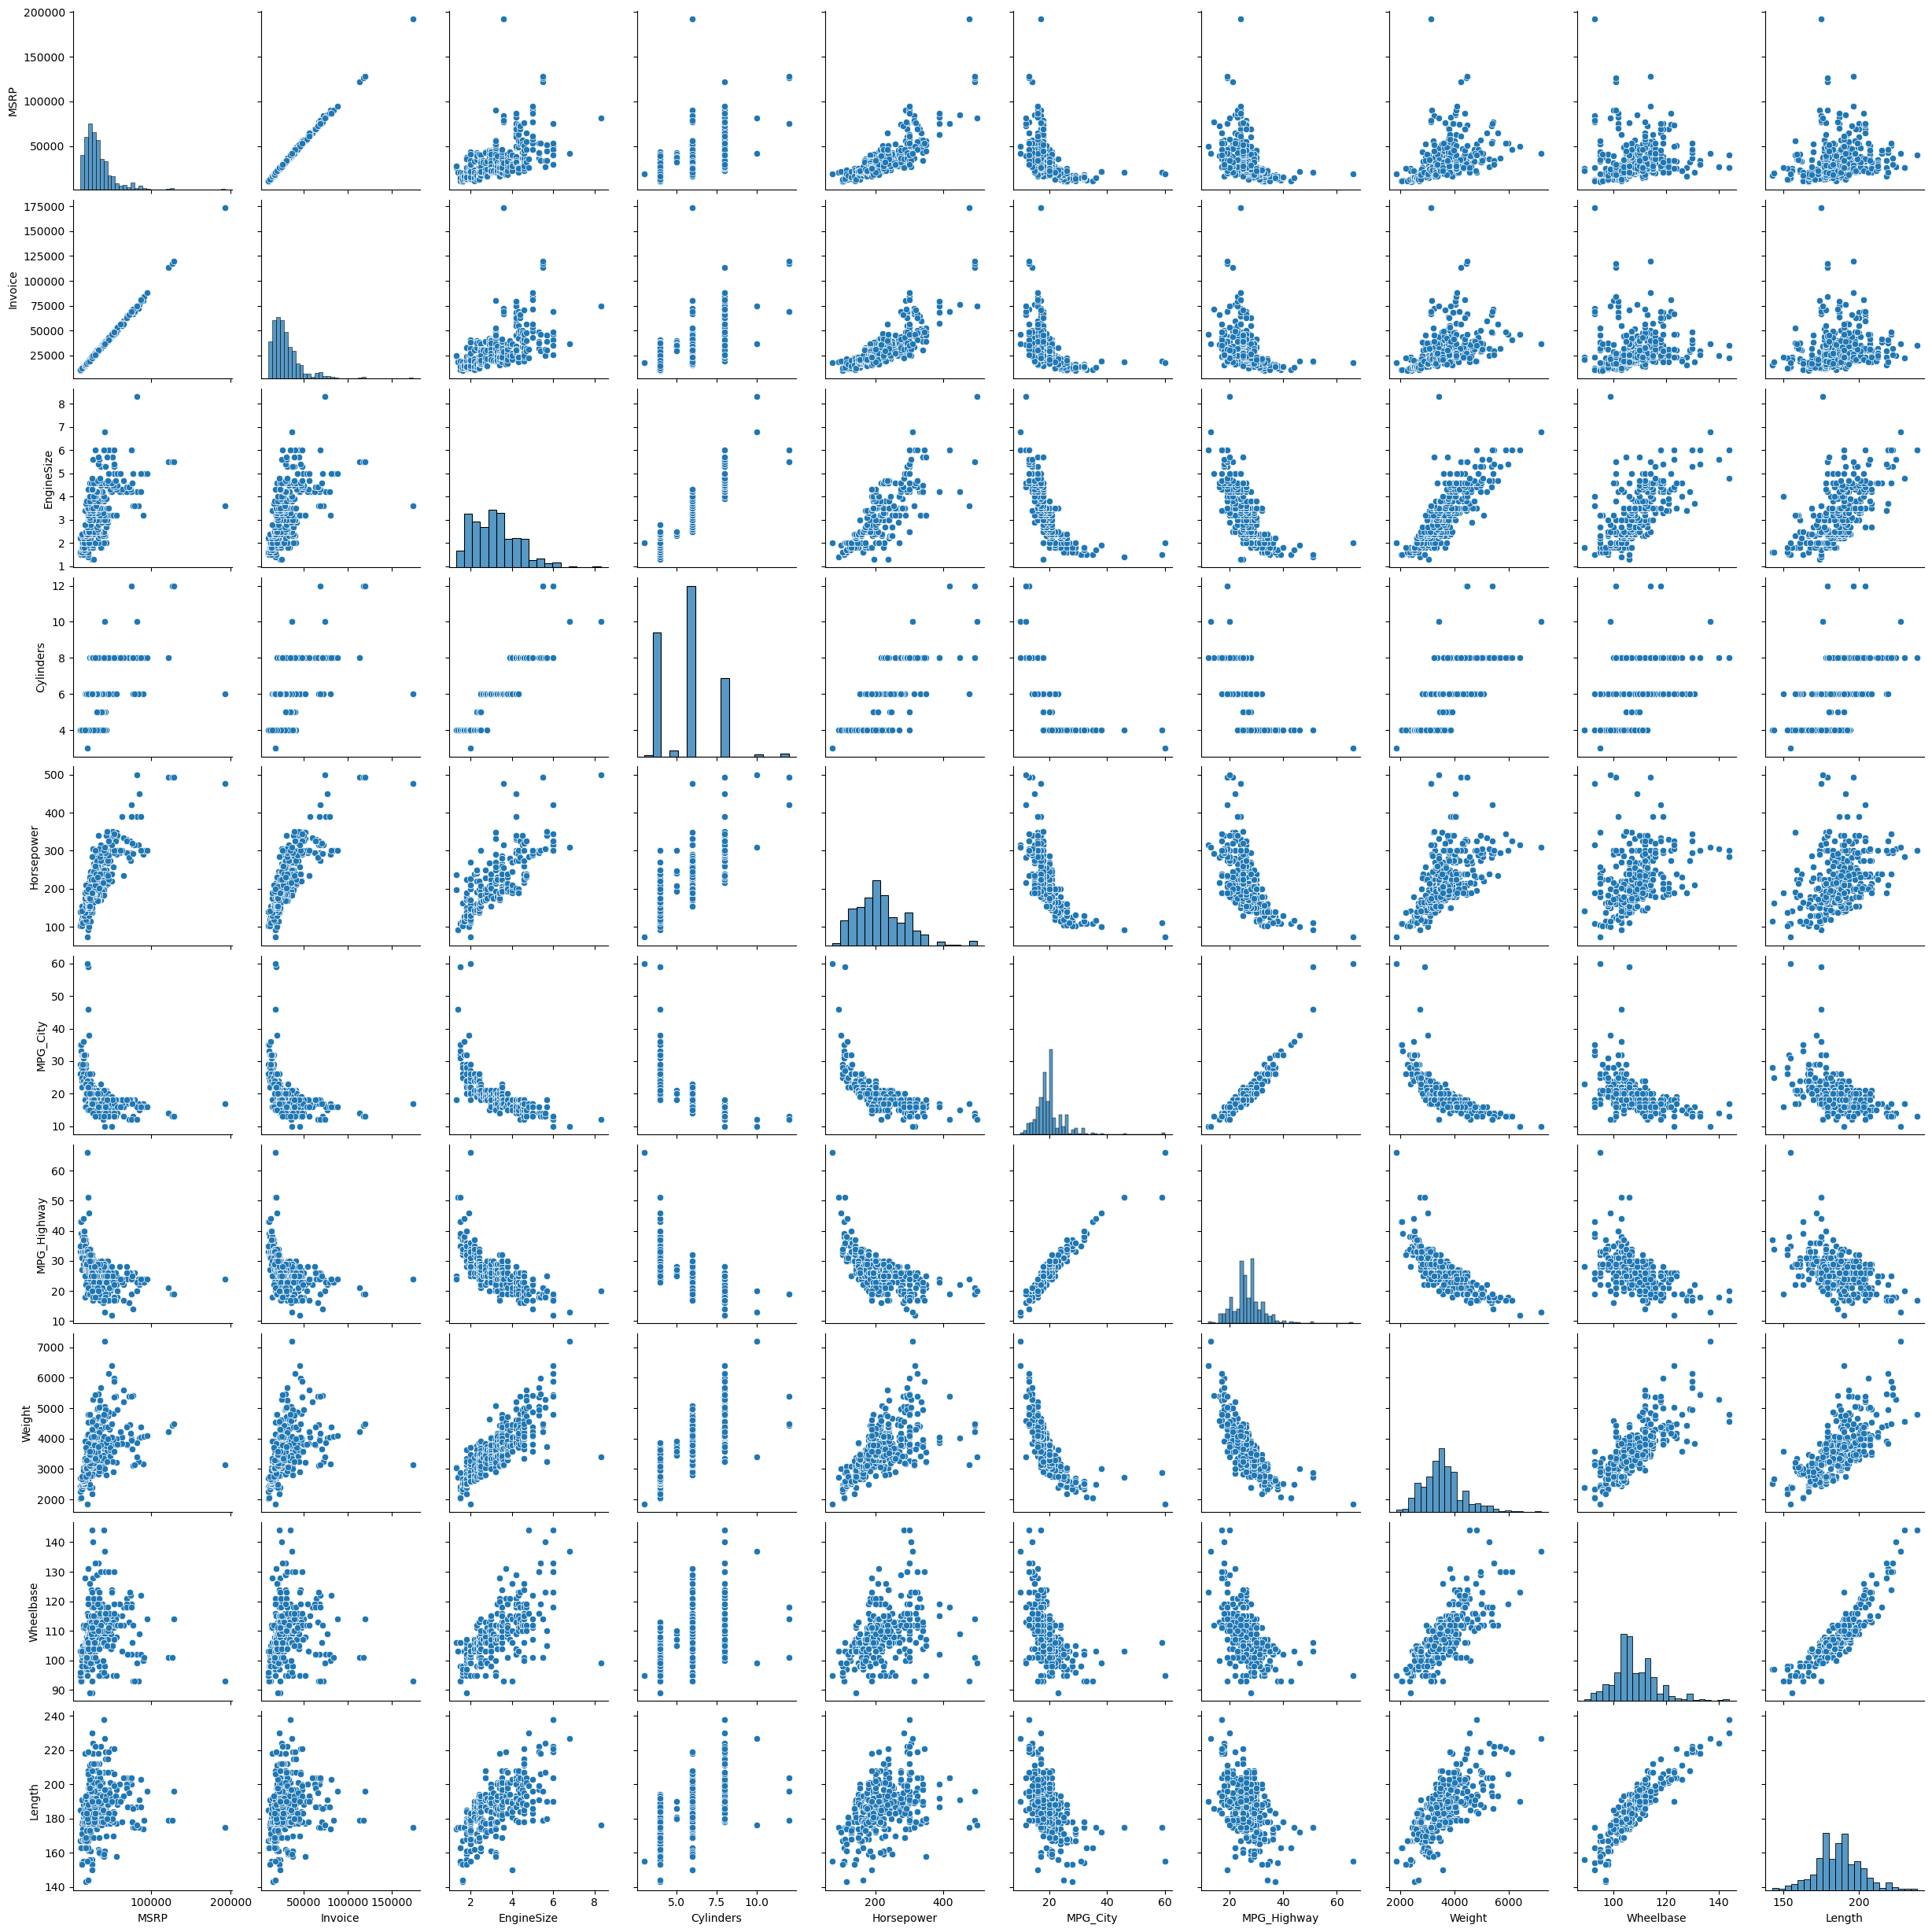

In [10]:
# Парная диаграмма
sns.pairplot(data = df)
plt.show("png")

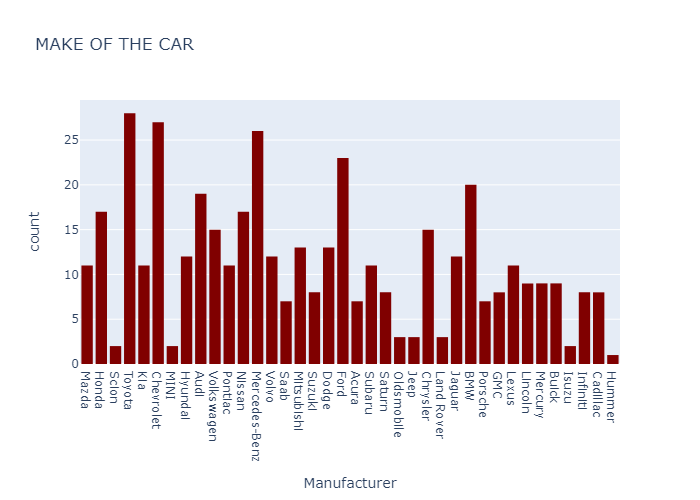

In [11]:
fig = px.histogram(df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show("png")

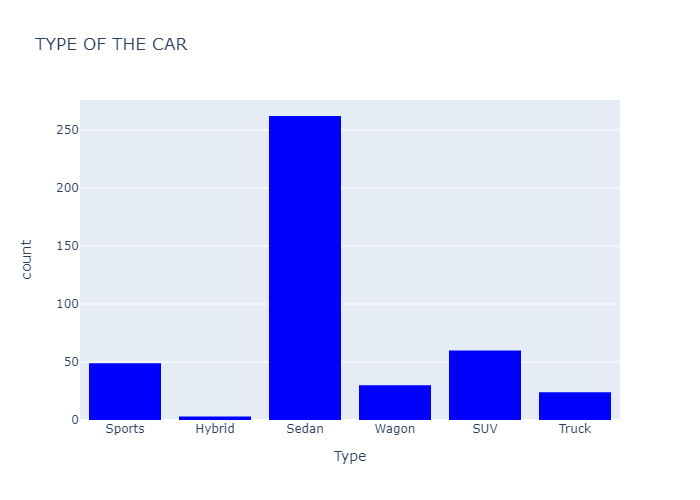

In [12]:
fig = px.histogram(df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show("png")

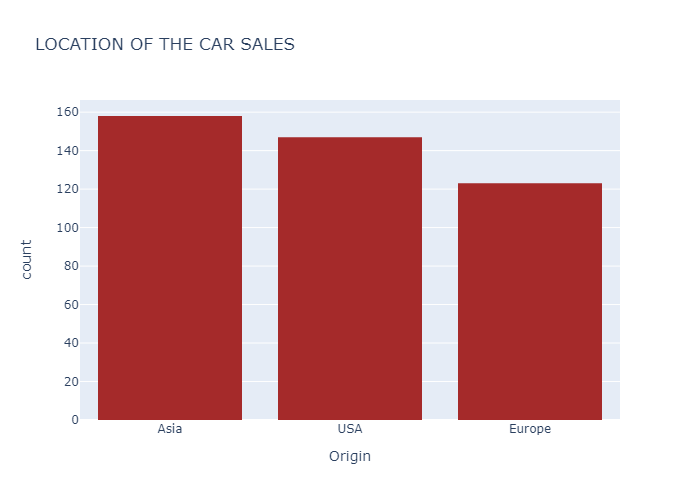

In [13]:
fig = px.histogram(df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show("png")

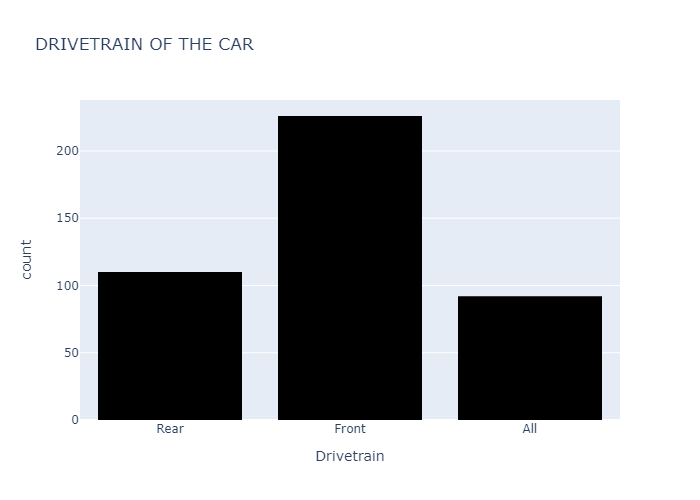

In [14]:
fig = px.histogram(df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show("png")

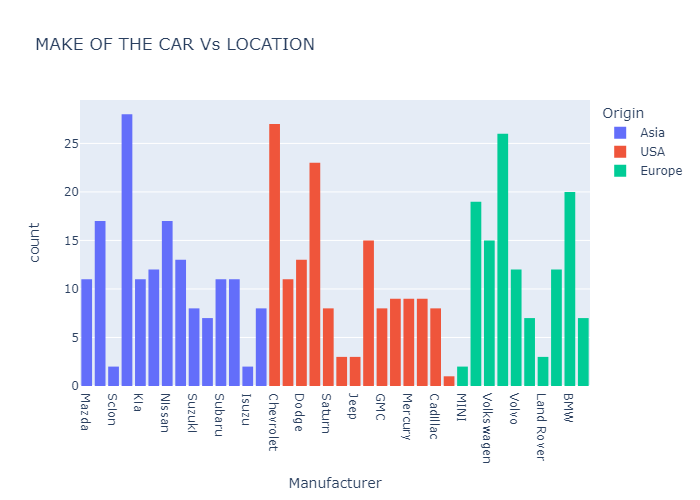

In [15]:
fig = px.histogram(df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show("png")

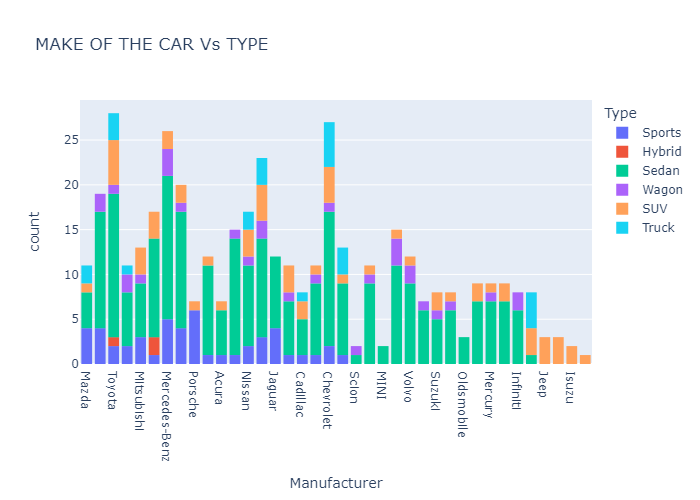

In [16]:
fig = px.histogram(df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs TYPE")
                  
fig.show("png")

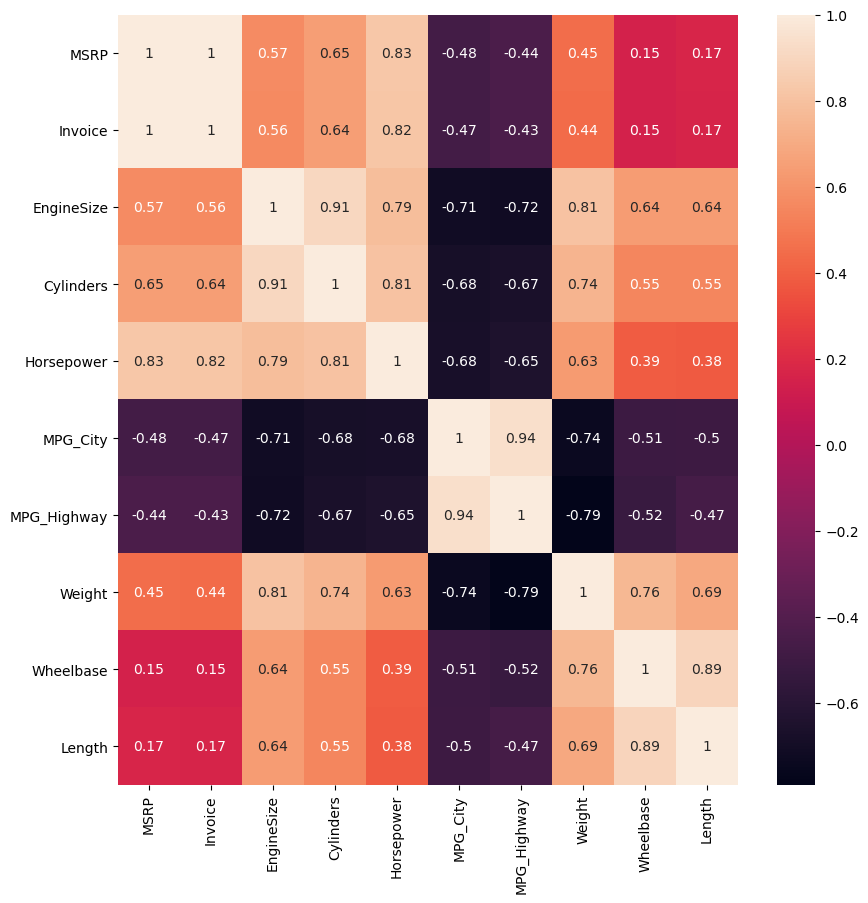

In [17]:
# получаем корреляционную матрицу
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show("png")

### Подготовка данных перед обучением модели

In [18]:
# Выполните одномоментное кодирование для "Make", "Model", "Type", "Origin" и "DriveTrain".
df_dum = pd.get_dummies(df, columns = ["Make", "Model", "Type", "Origin", "DriveTrain"])

In [19]:
# Функция счета-фактуры не способствует прогнозированию цены автомобиля
df_data = df_dum.drop(["Invoice"], axis = 1)

In [20]:
df_data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
247,25700,1.3,4.0,197,18,25,3053,106,174,0,...,0,1,0,0,1,0,0,0,0,1
248,27200,1.3,4.0,238,18,24,3029,106,174,0,...,0,1,0,0,1,0,0,0,0,1
149,20140,1.4,4.0,93,46,51,2732,103,175,0,...,0,0,0,0,1,0,0,0,1,0
352,12965,1.5,4.0,108,32,38,2340,93,154,0,...,1,0,0,0,1,0,0,0,1,0
373,20510,1.5,4.0,110,59,51,2890,106,175,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,46265,6.0,8.0,325,13,17,6133,130,219,0,...,0,0,0,0,0,0,1,1,0,0
87,40340,6.0,8.0,300,13,17,4804,144,238,0,...,0,0,1,0,0,0,1,1,0,0
62,52975,6.0,8.0,345,13,17,5879,130,221,0,...,0,0,1,0,0,0,1,1,0,0
118,41475,6.8,10.0,310,10,13,7190,137,227,0,...,0,0,0,0,0,0,1,1,0,0


In [21]:
# Подача входных данных в X и выходных (MSRP) в y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

### Обучение и оценка множественной линейной регрессии

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
accuracy_LinearRegression = lr.score(X_test, y_test)
accuracy_LinearRegression

0.8956380777177795

### Обучение и оценка моделей дерева решений и случайного леса 

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
accuracy_DecisionTree = dt.score(X_test, y_test)
accuracy_DecisionTree

0.7756981631787083

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(n_estimators=5, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [32]:
accuracy_RandomForest= rf.score(X_test, y_test)
accuracy_RandomForest

0.8461237313055752

### Обучение модели регрессора xg-boost

In [33]:
from xgboost import XGBRegressor

In [34]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.8800909788335469

### Сравнение моделей и расчет KPI регрессии

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



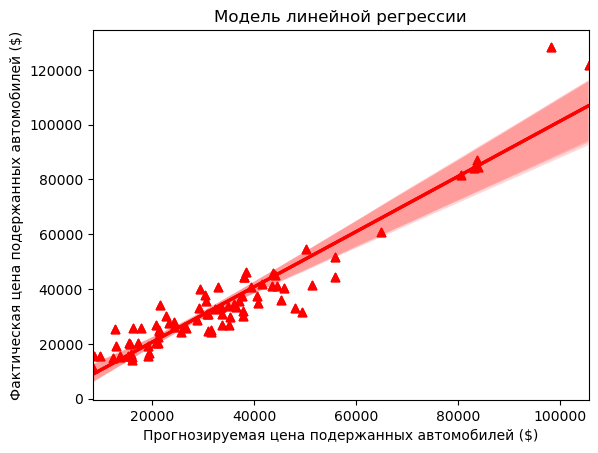

In [38]:
y_predict_linear = lr.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Модель линейной регрессии", xlabel = "Прогнозируемая цена подержанных автомобилей ($)", ylabel = "Фактическая цена подержанных автомобилей ($)")
plt.show("png")

In [39]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6684.344 
MSE = 44680448.60450459 
MAE = 4669.565221461747 
R2 = 0.8956380777177795


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



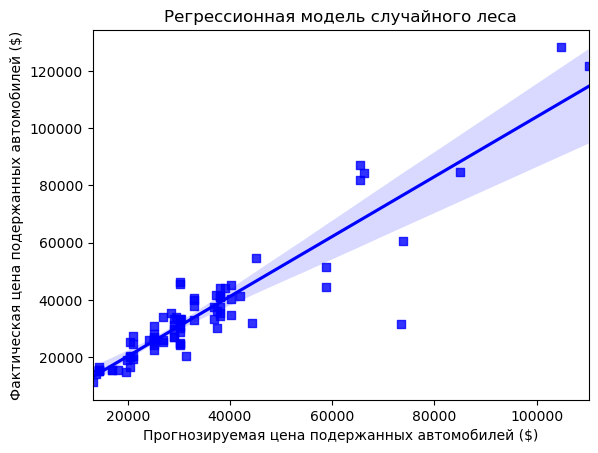

In [40]:
y_predict_RandomForest = rf.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Регрессионная модель случайного леса", xlabel = "Прогнозируемая цена подержанных автомобилей ($)", ylabel = "Фактическая цена подержанных автомобилей ($)")
plt.show("png")

In [41]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 8116.589 
MSE = 65879015.68410921 
MAE = 4990.62547899289 
R2 = 0.8461237313055752


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



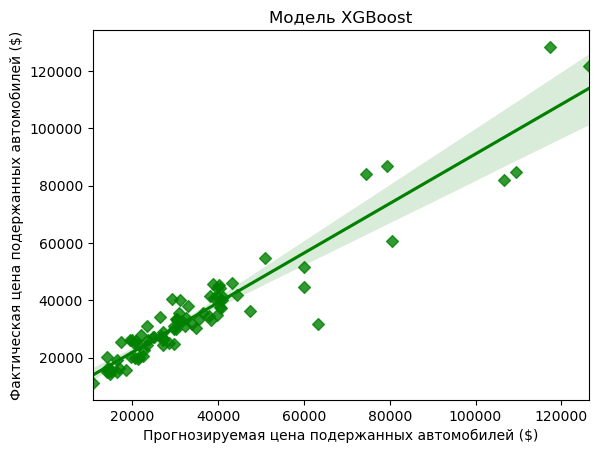

In [42]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "Модель XGBoost", xlabel = "Прогнозируемая цена подержанных автомобилей ($)", ylabel = "Фактическая цена подержанных автомобилей ($)")
plt.show("png")

In [43]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7164.958 
MSE = 51336624.89423981 
MAE = 4490.138160882994 
R2 = 0.8800909788335469
